<a href="https://colab.research.google.com/github/ankalagigaurave/Computer-Vision/blob/main/Assignment/CV_A3_J004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##To perform two-dimensional Fourier transform operation in an image

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from scipy import ndimage

In [2]:
tsu_1 = cv2.imread('//content/tsushima.png') 
tsu_3_1 = mpimg.imread('/content/tsushima.png')
tsu_2 = cv2.imread('/content/tsushima.png', cv2.IMREAD_GRAYSCALE)


Text(0.5, 1.0, 'The Ghost')

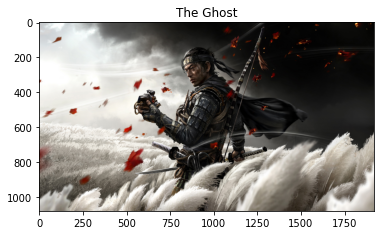

In [3]:
plt.imshow(tsu_3_1)
plt.title('The Ghost')

Text(0.5, 1.0, 'The Ghost - OpenCV colour scheme')

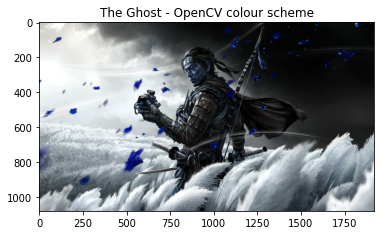

In [4]:
plt.imshow(tsu_1)
plt.title('The Ghost - OpenCV colour scheme')

Text(0.5, 1.0, 'The Ghost - Grayscale')

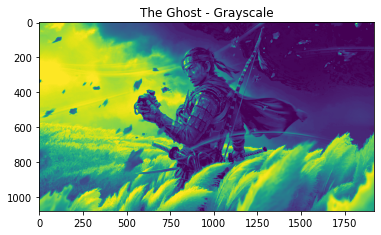

In [5]:
plt.imshow(tsu_2)
plt.title('The Ghost - Grayscale')

###Fourier Transform

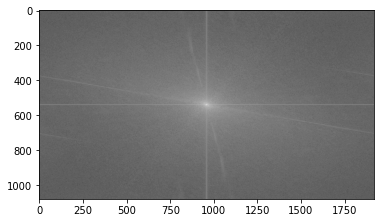

In [6]:
tsu_fastfourier = np.fft.fftshift(np.fft.fft2(tsu_2))
plt.imshow(np.log(abs(tsu_fastfourier)), cmap='gray');

AxesImage(54,36;334.8x217.44)


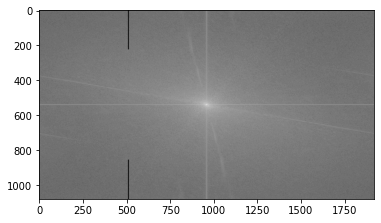

In [7]:
tsu_fourier = np.fft.fftshift(np.fft.fft2(tsu_2))
tsu_fourier[:225, 510:515] = 1
tsu_fourier[-225:,510:515] = 1
print(plt.imshow(np.log(abs(tsu_fourier)), cmap = 'gray'))

AxesImage(54,36;334.8x217.44)


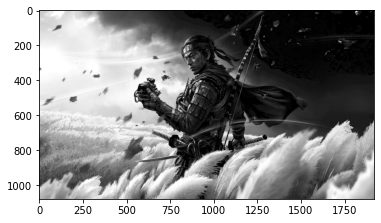

In [8]:
print(plt.imshow(tsu_2, cmap = 'gray'))

AxesImage(54,36;334.8x217.44)


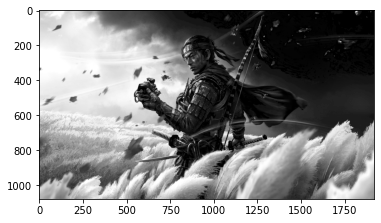

In [9]:
print(plt.imshow(abs(np.fft.ifft2(tsu_fourier)), cmap = 'gray'))

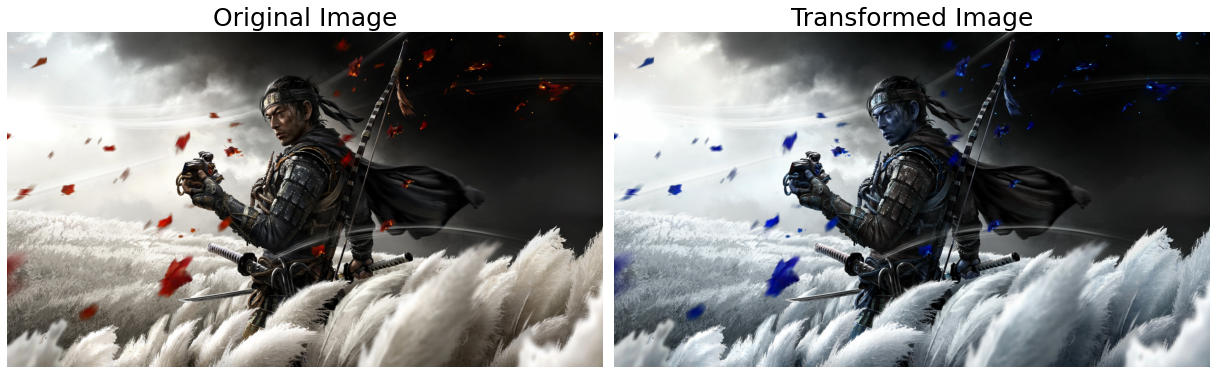

In [15]:
f_size = 25
transformed_channels = []
for i in range(3):
    rgb_fft = np.fft.fftshift(np.fft.fft2((tsu_1[:, :, i])))
    rgb_fft[:200, 510:515] = 1
    rgb_fft[-200:,510:515] = 1
    transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))
    
final_image = np.dstack([transformed_channels[0].astype(int), 
                             transformed_channels[1].astype(int), 
                             transformed_channels[2].astype(int)])
    
fig, ax = plt.subplots(1, 2, figsize=(17,12))
ax[0].imshow(tsu_3_1)
ax[0].set_title('Original Image', fontsize = f_size)
ax[0].set_axis_off()
    
ax[1].imshow(final_image)
ax[1].set_title('Transformed Image', fontsize = f_size)
ax[1].set_axis_off()
    
fig.tight_layout()
